# 神经网络的编程基础(Basics of Neural Network programming)

In [1]:
# 导入相关包
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imread
import h5py

In [2]:
def load_dataset():
    """导入数据集"""
    train_dataset = h5py.File("datasets/train_catvnoncat.h5", "r") # 读取训练集
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # 设置训练集的特征值
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # 设置训练集的标签

    test_dataset = h5py.File("datasets/test_catvnoncat.h5", "r") # 读取测试集
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # 设置测试集的特征值
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # 设置测试集的标签

    classes = np.array(test_dataset["list_classes"][:]) # 读取测试集的分类列表
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


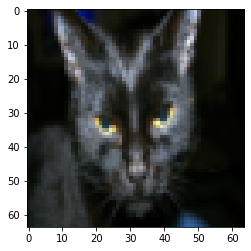

In [4]:
index = 25
plt.imshow(train_set_x_orig[index])
print(f"y = {str(train_set_y[:, index])}" + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print(f"Number of training examples: m_train = {str(m_train)}")
print(f"Number of testing examples: m_test = {str(m_test)}")
print(f"Height/Width of each image: num_px = {str(num_px)}")
print(f"Each image is of size: ({str(num_px)}, {str(num_px)}, 3)")
print(f"train_set_x shape: {str(train_set_x_orig.shape)}")
print(f"train_set_y shape: {str(train_set_y.shape)}")
print(f"test_set_x shape: {str(test_set_x_orig.shape)}")
print(f"test_set_y shape: {str(test_set_y.shape)}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

print(f"train_set_x_flatten shape: {str(train_set_x_flatten.shape)}")
print(f"train_set_y shape: {str(train_set_y.shape)}")
print(f"test_set_x_flatten shape: {str(test_set_x_flatten.shape)}")
print(f"test_set_y shape {str(test_set_y.shape)}")
print(f"sanity check after reshaping: {str(train_set_x_flatten[0:5, 0])}")

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [7]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [8]:
train_set_x.shape

(12288, 209)

In [9]:
def sigmoid(z):
    s = 1 / (1+np.exp(-z))
    return s

In [10]:
print(f"sigmoid([0, 2]) = {str(sigmoid(np.array([0,2])))}")

sigmoid([0, 2]) = [0.5        0.88079708]


In [11]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert isinstance(b, (float, int))

    return w, b

In [12]:
dim = 2
w, b = initialize_with_zeros(dim)
print(f"w = {str(w)}")
print(f"b = {str(b)}")

w = [[0.]
 [0.]]
b = 0


In [13]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw":dw,
            "db": db}

    return grads, cost 


In [14]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print(f"dw = {str(grads['dw'])}")
print(f"db = {str(grads['db'])}")
print(f"cost = {str(cost)}")

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [15]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and (i+1) % 100 == 0:
            print("Cost after iteration %i:%f" %(i+1, cost))

    params = {"w": w,
                "b": b}
    
    grads = {"dw": dw,
                "db": db}

    return params, grads, costs

In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print(f"w = {str(params['w'])}")
print(f"b = {str(params['b'])}")
print(f"dw = {str(grads['dw'])}")
print(f"db = {str(grads['db'])}")
print(f"cost = {str(cost)}")

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828
cost = 6.000064773192205


In [17]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0][i] = 1 if A[0][i]>0.5 else 0
    
    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [18]:
print(f"predictions = {str(predict(w, b, X))}")

predictions = [[1. 1.]]


In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")

    d = {"costs":costs,
        "Y_prediction_test":Y_prediction_test,
        "Y_prediction_train":Y_prediction_train,
        "w":w,
        "b":b,
        "learning_rate":learning_rate,
        "num_iterations":num_iterations}

    return d

In [20]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=False)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


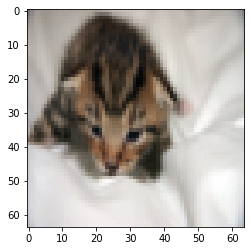

In [21]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print(f"y = {str(test_set_y[0,index])}" + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0, index])].decode("utf-8") + "\" picture.")

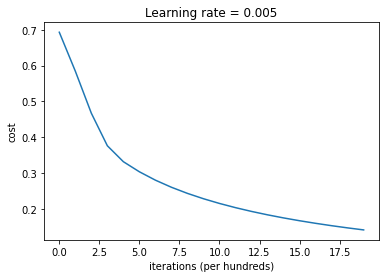

In [22]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations (per hundreds)")
plt.title(f"Learning rate = {str(d['learning_rate'])}")
plt.show()

learning rate is: 0.03
train accuracy: 100.0 %
test accuracy: 66.0 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



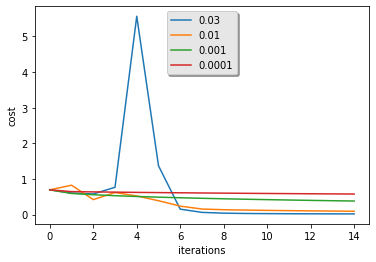

In [23]:
learning_rates = [0.03, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print(f"learning rate is: {str(i)}")
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 1.0, your algorithm predicts a "cat" picture.


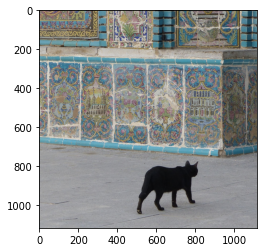

In [24]:
fname = "images/cat_in_iran.jpg"
image = np.array(imread(fname))
my_image = np.array(Image.fromarray(image).resize((num_px,num_px))).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print(f"y = {str(np.squeeze(my_predicted_image))}" + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")